# Framing

- Example is a particular instance of data, x
- Labeled example has {features, label}: (x, y)
        Used to train the model
- Unlabeled example has {features, ?}: (x, ?)
        Used for making predictions on new data
- Model maps examples to predicted labels: y'
        Defined by internal parameters, which are learned

### Regression vs Classification
- A regression model predicts continuous values. For example, regression models make predictions that answer questions like the following:
        What is the value of a house in California?
        What is the probability that a user will click on this ad?

- A classification model predicts discrete values. For example, classification models make predictions that answer questions like the following:
        Is a given email message spam or not spam?
        Is this an image of a dog, a cat, or a hamster?
        
### Training 
Training a model simply means learning (determining) good values for all the weights and the bias from labeled examples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss; this process is called empirical risk minimization.

### Loss
Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. The goal of training a model is to find a set of weights and biases that have low loss, on average, across all examples.

#### Mean square error (MSE) 
It is the average squared loss per example over the whole dataset. To calculate MSE, sum up all the squared losses for individual examples and then divide by the number of examples:

$\frac{1}{N} \sum_{(x,y \in D)} (y-prediction(x))^2$

Although MSE is commonly-used in machine learning, it is neither the only practical loss function nor the best loss function for all circumstances.

## Reducing Loss
### Gradient Descent 
Convex problems have only one minimum; that is, only one place where the slope is exactly 0. That minimum is where the loss function converges.

Calculating the loss function for every conceivable value of $w_1$ over the entire data set would be an inefficient way of finding the convergence point. Let's examine a better mechanism—very popular in machine learning—called gradient descent.

The first stage in gradient descent is to pick a starting value (a starting point) for $w_1$. The starting point doesn't matter much; therefore, many algorithms simply set $w_1$ to 0 or pick a random value.

The gradient always points in the direction of steepest increase in the loss function. The gradient descent algorithm takes a step in the direction of the negative gradient in order to reduce loss as quickly as possible. To determine the next point along the loss function curve, the gradient descent algorithm adds some fraction of the gradient's magnitude to the starting point. 

The gradient descent then repeats this process, edging ever closer to the minimum.

### Learning Rate
Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point.

Hyperparameters are the knobs that programmers tweak in machine learning algorithms. Most machine learning programmers spend a fair amount of time tuning the learning rate. If you pick a learning rate that is too small, learning will take too long. Conversely, if you specify a learning rate that is too large, the next point will perpetually bounce haphazardly across the bottom of the well like a quantum mechanics experiment gone horribly wrong

There's a Goldilocks learning rate for every regression problem. The Goldilocks value is related to how flat the loss function is. If you know the gradient of the loss function is small then you can safely try a larger learning rate, which compensates for the small gradient and results in a larger step size. 

### Stochastic Gradient Descent
In gradient descent, a batch is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. A very large batch may cause even a single iteration to take a very long time to compute.

By choosing examples at random from our data set, we could estimate (albeit, noisily) a big average from a much smaller one.

Stochastic gradient descent (SGD) takes this idea to the extreme--it uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

Mini-batch stochastic gradient descent (mini-batch SGD) is a compromise between full-batch iteration and SGD. A mini-batch is typically between 10 and 1,000 examples, chosen at random. Mini-batch SGD reduces the amount of noise in SGD but is still more efficient than full-batch.

# Tensorflow
TensorFlow APIs are arranged hierarchically, with the high-level APIs built on the low-level APIs. Machine learning researchers use the low-level APIs to create and explore new machine learning algorithms. tf.keras is the TensorFlow variant of the open-source Keras API.

![tf image](https://developers.google.com/machine-learning/crash-course/images/TFHierarchyNew.svg)

1. [Numpy Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=numpy_tf2-colab&hl=en) Colab exercise, which provides all the NumPy information you need for this course.
2. [Pandas Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=pandas_tf2-colab&hl=en) exercise, which provides all the pandas information you need for this course.

### Simple Linear Regression with Synthetic Data

In [3]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import tensorflow as tf

In [4]:
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


In [5]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [6]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 2ms/step - loss: 971.8752 - root_mean_squared_error: 31.1749
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 955.6766 - root_mean_squared_error: 30.9140
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 944.0568 - root_mean_squared_error: 30.7255
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 934.4051 - root_mean_squared_error: 30.5680
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 925.8943 - root_mean_squared_error: 30.4285
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 918.1411 - root_mean_squared_error: 30.3008
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 910.9312 - root_mean_squared_error: 30.1816
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 904.1323 - root_mean_squared_error: 30.0688
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 897.6557 - root_m

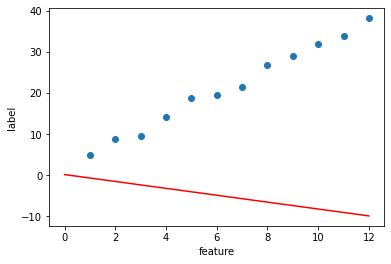

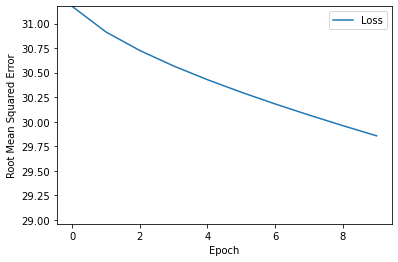

In [7]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

### Linear Regression with Real Data

In [23]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [24]:
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [25]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [26]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [27]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 1s 37us/sample - loss: 4238976.7001 - root_mean_squared_error: 2058.8784
Epoch 2/30
17000/17000 [==============================] - 0s 28us/sample - loss: 27841.4275 - root_mean_squared_error: 166.8575
Epoch 3/30
17000/17000 [==============================] - 0s 29us/sample - loss: 27085.9191 - root_mean_squared_error: 164.5780
Epoch 4/30
17000/17000 [==============================] - 1s 44us/sample - loss: 26178.0268 - root_mean_squared_error: 161.7962
Epoch 5/30
17000/17000 [==============================] - 0s 29us/sample - loss: 25479.9707 - root_mean_squared_error: 159.6245
Epoch 6/30
17000/17000 [==============================] - 1s 40us/sample - loss: 25069.7450 - root_mean_squared_error: 158.3343
Epoch 7/30
17000/17000 [==============================] - 1s 30us/sample - loss: 24137.9567 - root_mean_squared_error: 155.3640
Epoch 8/30
17000/17000 [==============================] - 1s 31us/sample - los

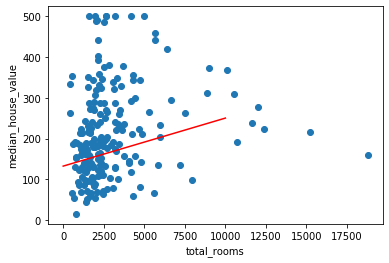

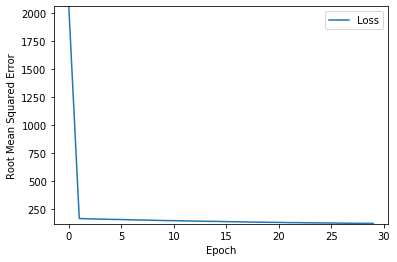

In [28]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [29]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

In [30]:
predict_house_values(10, my_feature, my_label)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1960     53             156
 3400     92             173
 3677     69             176
 2202     62             158
 2403     80             161
 5652    295             199
 3318    500             172
 2552    342             163
 1364    118             149
 3468    128             173


Train on 17000 samples
Epoch 1/20
17000/17000 [==============================] - 1s 32us/sample - loss: 38299.0813 - root_mean_squared_error: 195.7014
Epoch 2/20
17000/17000 [==============================] - 0s 28us/sample - loss: 19076.5906 - root_mean_squared_error: 138.1180
Epoch 3/20
17000/17000 [==============================] - 1s 57us/sample - loss: 15098.0711 - root_mean_squared_error: 122.8742
Epoch 4/20
17000/17000 [==============================] - 1s 36us/sample - loss: 14804.1275 - root_mean_squared_error: 121.6722
Epoch 5/20
17000/17000 [==============================] - 0s 28us/sample - loss: 14614.2507 - root_mean_squared_error: 120.8894
Epoch 6/20
17000/17000 [==============================] - 0s 29us/sample - loss: 14447.7099 - root_mean_squared_error: 120.1986
Epoch 7/20
17000/17000 [==============================] - 1s 52us/sample - loss: 14253.2030 - root_mean_squared_error: 119.3868
Epoch 8/20
17000/17000 [==============================] - 1s 45us/sample - loss: 

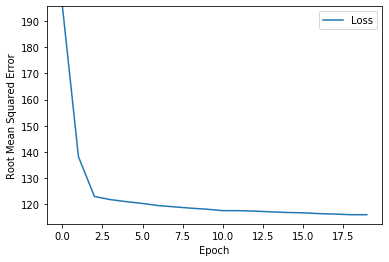

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    2     53             188
    2     92             200
    2     69             194
    2     62             210
    1     80             185
    2    295             225
    2    500             209
    2    342             223
    4    118             288
    2    128             213
    2    187             223
    3     80             234
    2    112             224
    2     95             218
    2     69             210


In [34]:
# Define a synthetic feature named rooms_per_person
training_df["rooms_per_person"] = training_df["total_rooms"]/training_df["population"] # write your code here.

# Don't change the next line.
my_feature = "rooms_per_person"

# Assign values to these three hyperparameters.
learning_rate = 0.06
epochs = 20
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [35]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


# Generalization
Generalization refers to your model's ability to adapt properly to new, previously unseen data, drawn from the same distribution as the one used to create the model.

Machine learning's goal is to predict well on new data drawn from a (hidden) true probability distribution. Unfortunately, the model can't see the whole truth; the model can only sample from a training data set. If a model fits the current examples well, how can you trust the model will also make good predictions on never-before-seen examples?

William of Ockham, a 14th century friar and philosopher, loved simplicity. He believed that scientists should prefer simpler formulas or theories over more complex ones. To put Ockham's razor in machine learning terms:

```
The less complex an ML model, the more likely that a good empirical result is not just due to the peculiarities of the sample.
```

A machine learning model aims to make good predictions on new, previously unseen data. But if you are building a model from your data set, how would you get the previously unseen data? Well, one way is to divide your data set into two subsets:

- training set—a subset to train a model.
- test set—a subset to test the model.

The following three basic assumptions guide generalization:

1. We draw examples independently and identically (i.i.d) at random from the distribution. In other words, examples don't influence each other. (An alternate explanation: i.i.d. is a way of referring to the randomness of variables.)
2. The distribution is stationary; that is the distribution doesn't change within the data set.
3. We draw examples from partitions from the same distribution.

### Splitting Data

Make sure that your test set meets the following two conditions:

1. Is large enough to yield statistically meaningful results.
2. Is representative of the data set as a whole. In other words, don't pick a test set with different characteristics than the training set.

**Never train on test data.**

### Validatiion Set
Dividing the data set into two sets is a good idea, but not a panacea. You can greatly reduce your chances of overfitting by partitioning the data set into the three subsets shown in the following figure:
![image](https://developers.google.com/machine-learning/crash-course/images/PartitionThreeSets.svg)

Use the validation set to evaluate results from the training set. Then, use the test set to double-check your evaluation after the model has "passed" the validation set. The following figure shows this new workflow:
![alt](https://developers.google.com/machine-learning/crash-course/images/WorkflowWithValidationSet.svg)

In this improved workflow:

1. Pick the model that does best on the validation set.
2. Double-check that model against the test set.
This is a better workflow because it creates fewer exposures to the test set.

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [9]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [10]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
136/136 [==============================] - 1s 8ms/step - loss: 40921.7539 - root_mean_squared_error: 202.2913 - val_loss: 49690.5586 - val_root_mean_squared_error: 222.9138
Epoch 2/30
136/136 [==============================] - 1s 5ms/step - loss: 23688.3301 - root_mean_squared_error: 153.9101 - val_loss: 29216.3457 - val_root_mean_squared_error: 170.9279
Epoch 3/30
136/136 [==============================] - 1s 8ms/step - loss: 12597.5850 - root_mean_squared_error: 112.2390 - val_loss: 15840.6221 - val_root_mean_squared_error: 125.8595
Epoch 4/30
136/136 [==============================] - 1s 4ms/step - loss: 7369.4302 - root_mean_squared_error: 85.8454 - val_loss: 9667.7637 - val_root_mean_squared_error: 98.3248
Epoch 5/30
136/136 [==============================] - 1s 4ms/step - loss: 6513.8804 - root_mean_squared_error: 80.7086 - val_loss: 9256.3809 - val_root_mean_squared_error: 96.2101
Epoch 6/30
136/136 [==============================] - 1s 5ms/step - loss: 6514.1553 - ro

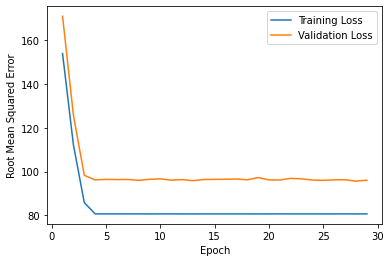

In [11]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.2

# Identify the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [12]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 8ms/step - loss: 7066.7402 - root_mean_squared_error: 84.0639


# Representation
### Feature Engineering
Integer and floating-point data don't need a special encoding because they can be multiplied by a numeric weight. As suggested in Figure 2, converting the raw integer value 6 to the feature value 6.0 is trivial:
![](https://developers.google.com/machine-learning/crash-course/images/FloatingPointFeatures.svg)

Categorical features have a discrete set of possible values. For example, there might be a feature called street_name with options that include:

```
{'Charleston Road', 'North Shoreline Boulevard', 'Shorebird Way', 'Rengstorff Avenue'}
```

Since models cannot multiply strings by the learned weights, we use feature engineering to convert strings to numeric values.

We can accomplish this by defining a mapping from the feature values, which we'll refer to as the vocabulary of possible values, to integers. Since not every street in the world will appear in our dataset, we can group all other streets into a catch-all "other" category, known as an OOV (out-of-vocabulary) bucket.

However, if we incorporate these index numbers directly into our model, it will impose some constraints that might be problematic:

- We'll be learning a single weight that applies to all streets. For example, if we learn a weight of 6 for street_name, then we will multiply it by 0 for Charleston Road, by 1 for North Shoreline Boulevard, 2 for Shorebird Way and so on. Consider a model that predicts house prices using street_name as a feature. It is unlikely that there is a linear adjustment of price based on the street name, and furthermore this would assume you have ordered the streets based on their average house price. Our model needs the flexibility of learning different weights for each street that will be added to the price estimated using the other features.
- We aren't accounting for cases where street_name may take multiple values. For example, many houses are located at the corner of two streets, and there's no way to encode that information in the street_name value if it contains a single index.

To remove both these constraints, we can instead create a binary vector for each categorical feature in our model that represents values as follows:

- For values that apply to the example, set corresponding vector elements to 1.
- Set all other elements to 0.

The length of this vector is equal to the number of elements in the vocabulary. This representation is called a **one-hot encoding** when a single value is 1, and a **multi-hot encoding** when multiple values are 1.

Figure 3 illustrates a one-hot encoding of a particular street: Shorebird Way. The element in the binary vector for Shorebird Way has a value of 1, while the elements for all other streets have values of 0.

![](https://developers.google.com/machine-learning/crash-course/images/OneHotEncoding.svg)

This approach effectively creates a Boolean variable for every feature value (e.g., street name). Here, if a house is on Shorebird Way then the binary value is 1 only for Shorebird Way. Thus, the model uses only the weight for Shorebird Way

Suppose that you had 1,000,000 different street names in your data set that you wanted to include as values for street_name. Explicitly creating a binary vector of 1,000,000 elements where only 1 or 2 elements are true is a very inefficient representation in terms of both storage and computation time when processing these vectors. In this situation, a common approach is to use a sparse representation in which only nonzero values are stored. In sparse representations, an independent model weight is still learned for each feature value, as described above.

### Good Features
- Avoid rarely used discrete feature values
- Prefer clear and obvious meanings
- Don't mix "magic" values with actual data
- Account for upstream instability

### Cleaning Data
1. Scaling feature values
    Scaling means converting floating-point feature values from their natural range (for example, 100 to 900) into a standard range (for example, 0 to 1 or -1 to +1). If a feature set consists of only a single feature, then scaling provides little to no practical benefit. If, however, a feature set consists of multiple features, then feature scaling provides the following benefits:

    - Helps gradient descent converge more quickly.
    - Helps avoid the "NaN trap," in which one number in the model becomes a NaN (e.g., when a value exceeds the floating-point precision limit during training), and—due to math operations—every other number in the model also eventually becomes a NaN.
    - Helps the model learn appropriate weights for each feature. Without feature scaling, the model will pay too much attention to the features having a wider range.
    You don't have to give every floating-point feature exactly the same scale. Nothing terrible will happen if Feature A is scaled from -1 to +1 while Feature B is scaled from -3 to +3. However, your model will react poorly if Feature B is scaled from 5000 to 100000.
    
2. Handling extreme outliers
3. Binning
    The following plot shows the relative prevalence of houses at different latitudes in California. Notice the clustering—Los Angeles is about at latitude 34 and San Francisco is roughly at latitude 38.
    ![](https://developers.google.com/machine-learning/crash-course/images/ScalingBinningPart1.svg)
    n the data set, latitude is a floating-point value. However, it doesn't make sense to represent latitude as a floating-point feature in our model. That's because no linear relationship exists between latitude and housing values. For example, houses in latitude 35 are not  more expensive (or less expensive) than houses at latitude 34. And yet, individual latitudes probably are a pretty good predictor of house values.

    To make latitude a helpful predictor, let's divide latitudes into "bins" as suggested by the following figure:
    ![](https://developers.google.com/machine-learning/crash-course/images/ScalingBinningPart2.svg)
    Instead of having one floating-point feature, we now have 11 distinct boolean features (LatitudeBin1, LatitudeBin2, ..., LatitudeBin11). Having 11 separate features is somewhat inelegant, so let's unite them into a single 11-element vector. Doing so will enable us to represent latitude 37.4 as follows:
    ```
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    ```
    Thanks to binning, our model can now learn completely different weights for each latitude.
 
4. Scrubbing
    Clean out the bad data

# Feature Crosses
- Linear learners use linear models
- Such learners scale well to massive data e.g., Vowpal Wabbit, sofia-ml
- But without feature crosses, the expressivity of these models would be limited
- Using feature crosses + massive data is one efficient strategy for learning highly complex models
        Foreshadowing: neural nets provide another

![](https://developers.google.com/machine-learning/crash-course/images/LinearProblemNot.png)

To solve the nonlinear problem shown in Figure 2, create a feature cross. A feature cross is a synthetic feature that encodes nonlinearity in the feature space by multiplying two or more input features together. (The term cross comes from cross product.) Let's create a feature cross named $x_3$ by crossing $x_1$ and $x_2$ :
        
$x_3={x_1}x_2$

Thanks to stochastic gradient descent, linear models can be trained efficiently. Consequently, supplementing scaled linear models with feature crosses has traditionally been an efficient way to train on massive-scale data sets.

### Crossing One-Hot Vectors
Machine learning models do frequently cross one-hot feature vectors.

Linear learners scale well to massive data. Using feature crosses on massive data sets is one efficient strategy for learning highly complex models. Neural networks provide another strategy.

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


In [4]:
# Load the dataset
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

# Scale the labels
scale_factor = 1000.0
# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

# Shuffle the examples
train_df = train_df.reindex(np.random.permutation(train_df.index))

In [5]:
# Create an empty list that will eventually hold all feature columns.
feature_columns = []

# Create a numerical feature column to represent latitude.
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

# Create a numerical feature column to represent longitude.
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
fp_feature_layer = layers.DenseFeatures(feature_columns)

In [6]:
def create_model(my_learning_rate, feature_layer):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add the layer containing the feature columns to the model.
  model.add(feature_layer)

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


Train on 17000 samples
Epoch 1/30
17000/17000 [==============================] - 2s 106us/sample - loss: 16333.5866 - root_mean_squared_error: 127.8029
Epoch 2/30
17000/17000 [==============================] - 1s 67us/sample - loss: 13558.8470 - root_mean_squared_error: 116.4424
Epoch 3/30
17000/17000 [==============================] - 1s 70us/sample - loss: 13524.0235 - root_mean_squared_error: 116.2928
Epoch 4/30
17000/17000 [==============================] - 1s 71us/sample - loss: 13473.5717 - root_mean_squared_error: 116.0757
Epoch 5/30
17000/17000 [==============================] - 1s 81us/sample - loss: 13426.2199 - root_mean_squared_error: 115.8716
Epoch 6/30
17000/17000 [==============================] - 1s 69us/sample - loss: 13375.7435 - root_mean_squared_error: 115.6536
Epoch 7/30
17000/17000 [==============================] - 1s 71us/sample - loss: 13338.5112 - root_mean_squared_error: 115.4925
Epoch 8/30
17000/17000 [==============================] - 1s 80us/sample - loss:

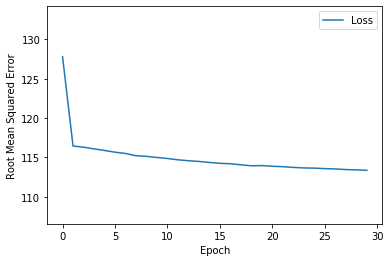


: Evaluate the new model against the test set:
3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[12301.132747395834, 110.91047]

In [7]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# Create and compile the model's topography.
my_model = create_model(learning_rate, fp_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [8]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), 
                                     int(max(train_df['latitude'])), 
                                     resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, 
                                               latitude_boundaries)
feature_columns.append(latitude)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), 
                                      int(max(train_df['longitude'])), 
                                      resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, 
                                                longitude_boundaries)
feature_columns.append(longitude)

# Convert the list of feature columns into a layer that will ultimately become
# part of the model. Understanding layers is not important right now.
buckets_feature_layer = layers.DenseFeatures(feature_columns)

Train on 17000 samples
Epoch 1/35
17000/17000 [==============================] - 1s 75us/sample - loss: 52088.3953 - root_mean_squared_error: 228.2288
Epoch 2/35
17000/17000 [==============================] - 1s 44us/sample - loss: 44695.7943 - root_mean_squared_error: 211.4138
Epoch 3/35
17000/17000 [==============================] - 1s 52us/sample - loss: 38115.8960 - root_mean_squared_error: 195.2330
Epoch 4/35
17000/17000 [==============================] - 1s 71us/sample - loss: 32275.3864 - root_mean_squared_error: 179.6535
Epoch 5/35
17000/17000 [==============================] - 1s 81us/sample - loss: 27268.8241 - root_mean_squared_error: 165.1328
Epoch 6/35
17000/17000 [==============================] - 1s 83us/sample - loss: 23020.5447 - root_mean_squared_error: 151.7252
Epoch 7/35
17000/17000 [==============================] - 2s 91us/sample - loss: 19503.6763 - root_mean_squared_error: 139.6556
Epoch 8/35
17000/17000 [==============================] - 1s 82us/sample - loss: 

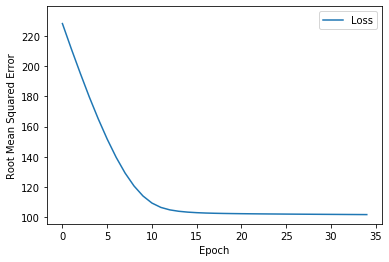


: Evaluate the new model against the test set:
3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[10197.325406901042, 100.98182]

In [9]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the buckets_feature_layer.
my_model = create_model(learning_rate, buckets_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [10]:
resolution_in_degrees = 1.0 

# Create a new empty list that will eventually hold the generated feature column.
feature_columns = []

# Create a bucket feature column for latitude.
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), int(max(train_df['latitude'])), resolution_in_degrees))
latitude = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

# Create a bucket feature column for longitude.
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), int(max(train_df['longitude'])), resolution_in_degrees))
longitude = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

# Create a feature cross of latitude and longitude.
latitude_x_longitude = tf.feature_column.crossed_column([latitude, longitude], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
feature_columns.append(crossed_feature)

# Convert the list of feature columns into a layer that will later be fed into
# the model. 
feature_cross_feature_layer = layers.DenseFeatures(feature_columns)

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Train on 17000 samples
Epoch 1/35
17000/17000 [==============================] - 1s 45us/sample - loss: 53546.8460 - root_mean_squared_error: 231.4019
Epoch 2/35
17000/17000 [==============================] - 1s 38us/sample - loss: 48502.8735 - root_mean_squared_error: 220.2337
Epoch 3/35
17000/17000 [==============================] - 0s 27us/sample - loss: 43826.0806 - root_mean_squared_error: 209.3468
Epoch 4/35
17000/17000 [==============================] - 0s 19us/sample - loss: 39458.4162 - root_mean_squared_error: 198.6414
Epoch 5/35
17000/17000 [==============================] - 0s 20us/sample - loss: 35430.6029 - root_mean_squared_error: 188.2302
Epoch 6/35
17000/17000 [==============================] - 0s 20us/sample - loss: 31757.40

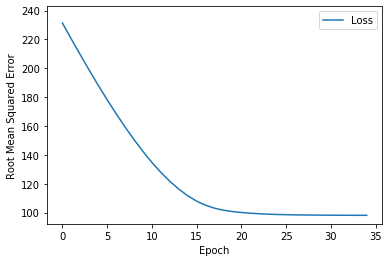


: Evaluate the new model against the test set:
3000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[9519.838395182293, 97.56966]

In [11]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(learning_rate, feature_cross_feature_layer)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

# Regularization
Instead of simply aiming to minimize loss (empirical risk minimization):

        minimize(Loss(Data|Model))

we'll now minimize loss+complexity, which is called structural risk minimization:

        minimize(Loss(Data|Model) + λ complexity(Model)) 
        
Our training optimization algorithm is now a function of two terms: the loss term, which measures how well the model fits the data, and the regularization term, which measures model complexity.

Machine Learning Crash Course focuses on two common (and somewhat related) ways to think of model complexity:

1. Model complexity as a function of the weights of all the features in the model.
2. Model complexity as a function of the total number of features with nonzero weights. (A later module covers this approach.)

We can quantify complexity using the L2 regularization formula, which defines the regularization term as the sum of the squares of all the feature weights:

$L_2 regularization term = ||w||_2^2 = \sum_{i=1}^n{w}_i^2$

Performing L2 regularization has the following effect on a model

1. Encourages weight values toward 0 (but not exactly 0)
2. Encourages the mean of the weights toward 0, with a normal (bell-shaped or Gaussian) distribution.

Increasing the lambda value strengthens the regularization effect. For example, the histogram of weights for a high value of lambda might look as shown in Figure 2.

![](https://developers.google.com/machine-learning/crash-course/images/HighLambda.svg)

When choosing a lambda value, the goal is to strike the right balance between simplicity and training-data fit:
- If your lambda value is too high, your model will be simple, but you run the risk of underfitting your data. Your model won't learn enough about the training data to make useful predictions.
- If your lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. Your model will learn too much about the particularities of the training data, and won't be able to generalize to new data.

# Logistic Regression

In many cases, you'll map the logistic regression output into the solution to a binary classification problem, in which the goal is to correctly predict one of two possible labels (e.g., "spam" or "not spam"). A later module focuses on that.

You might be wondering how a logistic regression model can ensure output that always falls between 0 and 1. As it happens, a sigmoid function, defined as follows, produces output having those same characteristics:

$y = \frac{1}{1+e^{-z}}$

$z = b + \sum_{i=1}^N {w_i}{x_i}$

The sigmoid function yields the following plot:
![](https://developers.google.com/machine-learning/crash-course/images/SigmoidFunction.png)

### Loss and Regression
The loss function for linear regression is squared loss. The loss function for logistic regression is Log Loss, which is defined as follows:

$Loss = \sum_{(x,y)\in{D}}{-ylog(y') - (1-y)log(1-y')}$

Regularization is extremely important in logistic regression modeling. Without regularization, the asymptotic nature of logistic regression would keep driving loss towards 0 in high dimensions. Consequently, most logistic regression models use one of the following two strategies to dampen model complexity:

- L2 regularization.
- Early stopping, that is, limiting the number of training steps or the learning rate.